In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [0]:
#importing the liberaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Problem Description :** Predict the Final Price of the House based on few features. For Example, some people want Two Bedroom or other want Three Bedroom House. So the House Sale Price Depend on the Living Area of the House and Depend upon how many people want small or Big one. We can predict which living area is high in demand and what cost of house.

The very First Step in preparing the good model is perform EDA (Explotary Data Analysis.) Let's Do it. 
1. EDA - Steps of EDA 


#Variable Identification
  ### 1.1 First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

In [27]:
#display the top 5 values
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
#shape of train data
train.shape

(1460, 81)

Here we can to know Predictor Variables , Target Variable , their types and type of Data Set


In this Data Set , Target Variable is SALE PRICE and Rest Are Predictor


There Object, Float and Int DataTypes.

Type of Data 
1. Categorical 2. Ordinal (mix of int and string)

In [30]:
#you can also check the data set information using the info() command.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 1.2 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

**Continuous Variables:-** In case of continuous variables, we need to understand the central tendency and spread of the variable. Note: Univariate analysis is also used to highlight missing and outlier values. In the upcoming part of this series, we will look at methods to handle missing and outlier values. To know more about these methods, you can refer https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

Skewness: 1.882876
Kurtosis: 6.536282


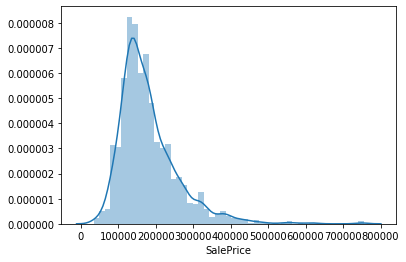

In [36]:
#Analysis for numerical variable

train['SalePrice'].describe()
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

**Above Graph is showing Positive Skewness, Now we will get rid of the skewness by using log transformation. **

### **Transforming **


 mu = 180921.20 and sigma = 79415.29


 mu = 12.02 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

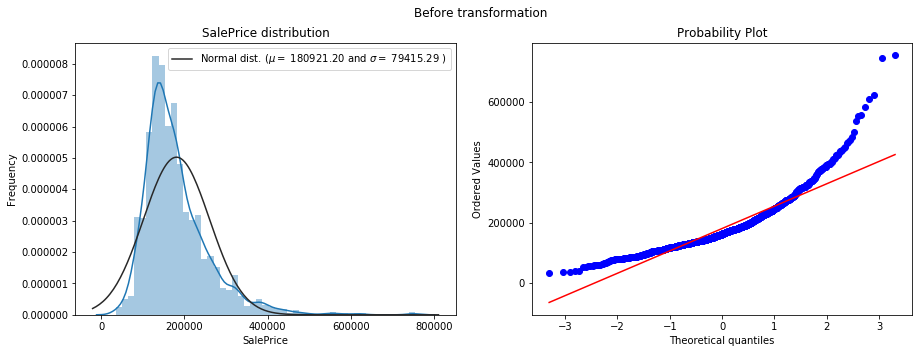

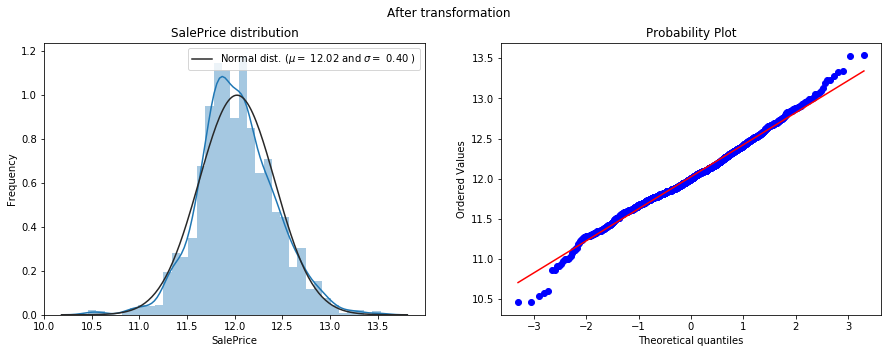

In [37]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
train.SalePrice = np.log1p(train.SalePrice )
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

# Concatenate  train and test
This is good practice to concatenate the test and train data before start working on missing values.

In [41]:
# y_train_orig = train.SalePrice
# train.drop("SalePrice", axis = 1, inplace = True)
data_features = pd.concat((train, test), sort=False).reset_index(drop=True)
print(data_features.shape)

# print(train.SalePrice)

(2919, 81)


## Missing data

In [42]:
#Let's check if the data set has any missing values. 
data_features.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

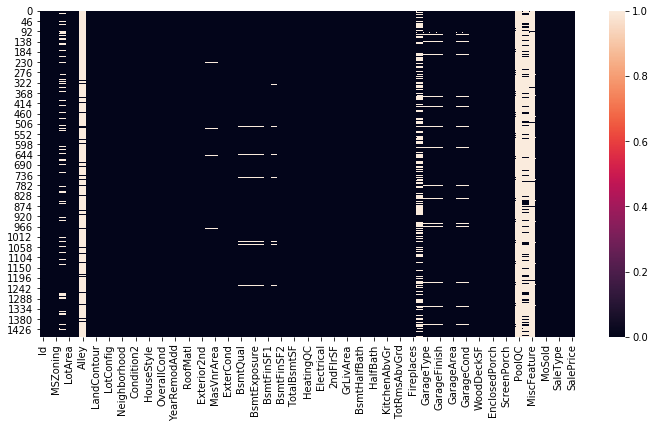

In [43]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [47]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(data_features)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          49.777321
MiscFeature     48.167181
Alley           46.899623
Fence           40.390545
FireplaceQu     23.638232
LotFrontage      8.872902
GarageYrBlt      2.774923
GarageType       2.774923
GarageFinish     2.774923
GarageQual       2.774923
GarageCond       2.774923
BsmtFinType2     1.301816
BsmtExposure     1.301816
BsmtFinType1     1.267557
BsmtCond         1.267557
BsmtQual         1.267557
MasVnrArea       0.274066
MasVnrType       0.274066
Electrical       0.034258
dtype: float64

## Visualising missing values

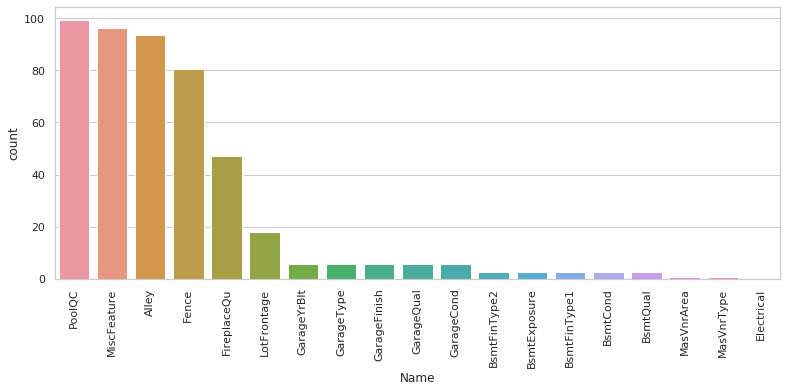

In [45]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [46]:
#missing data percent plot, basically percent plot is for categorical columns

total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


# Bi-variate Analysis
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

In [0]:
Corralation between train And test attributes

In [0]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = data_features.select_dtypes(include=[np.number])

In [49]:
train_corr.shape


(2919, 38)

In [0]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

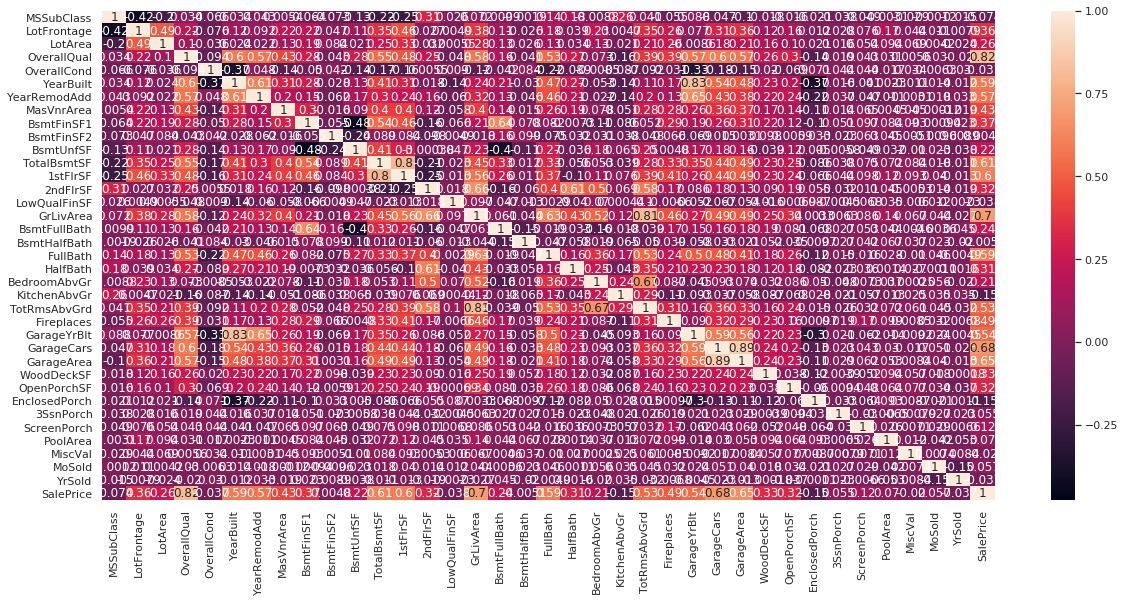

In [51]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

# Top 50% Corralation concatenate attributes with sale-price


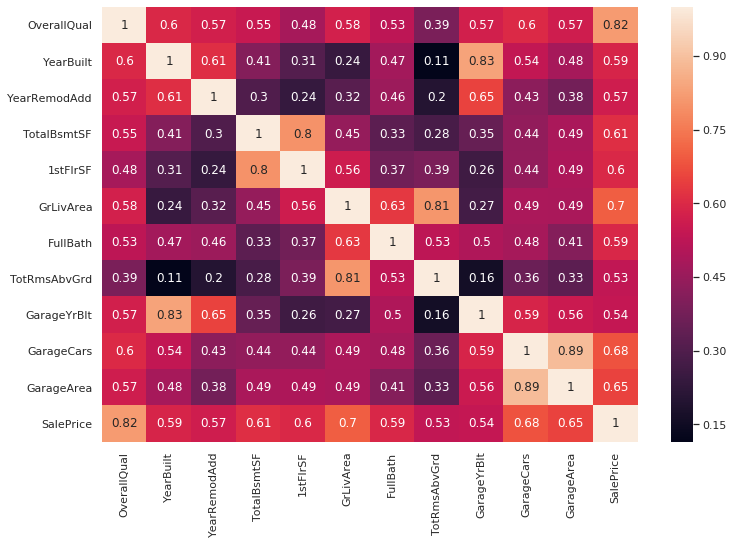

In [53]:
#0.5 is nothing but a threshold value.
#It is good to take it 0.5 because your feautres which are fitting under this threshold will give good accuracy.

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data_features[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## Here OverallQual is highly correlated with target feature of saleprice by 82%

In [54]:
#unique value of OverallQual
data_features.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

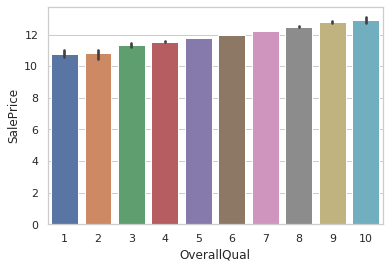

In [55]:
sns.barplot(data_features.OverallQual, data_features.SalePrice)

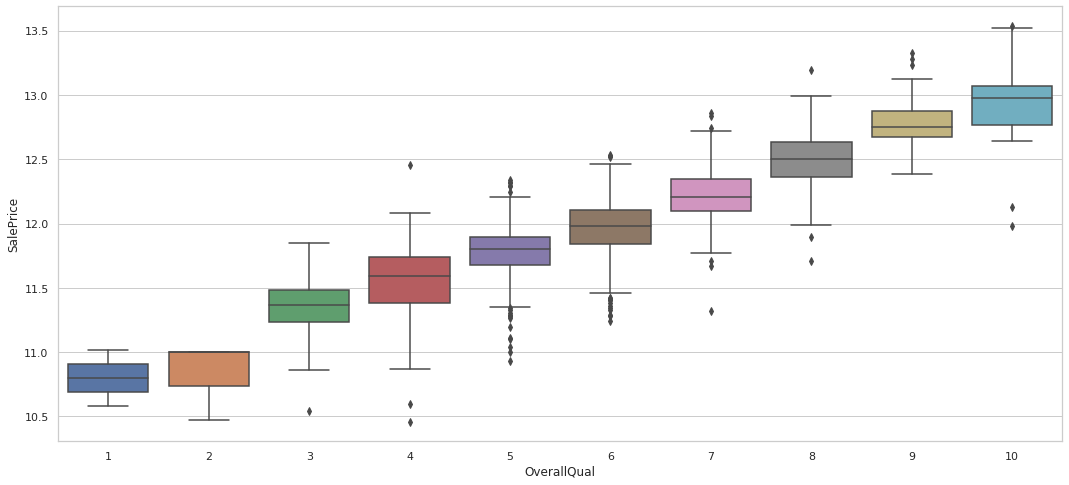

In [56]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=data_features.OverallQual, y=data_features.SalePrice)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


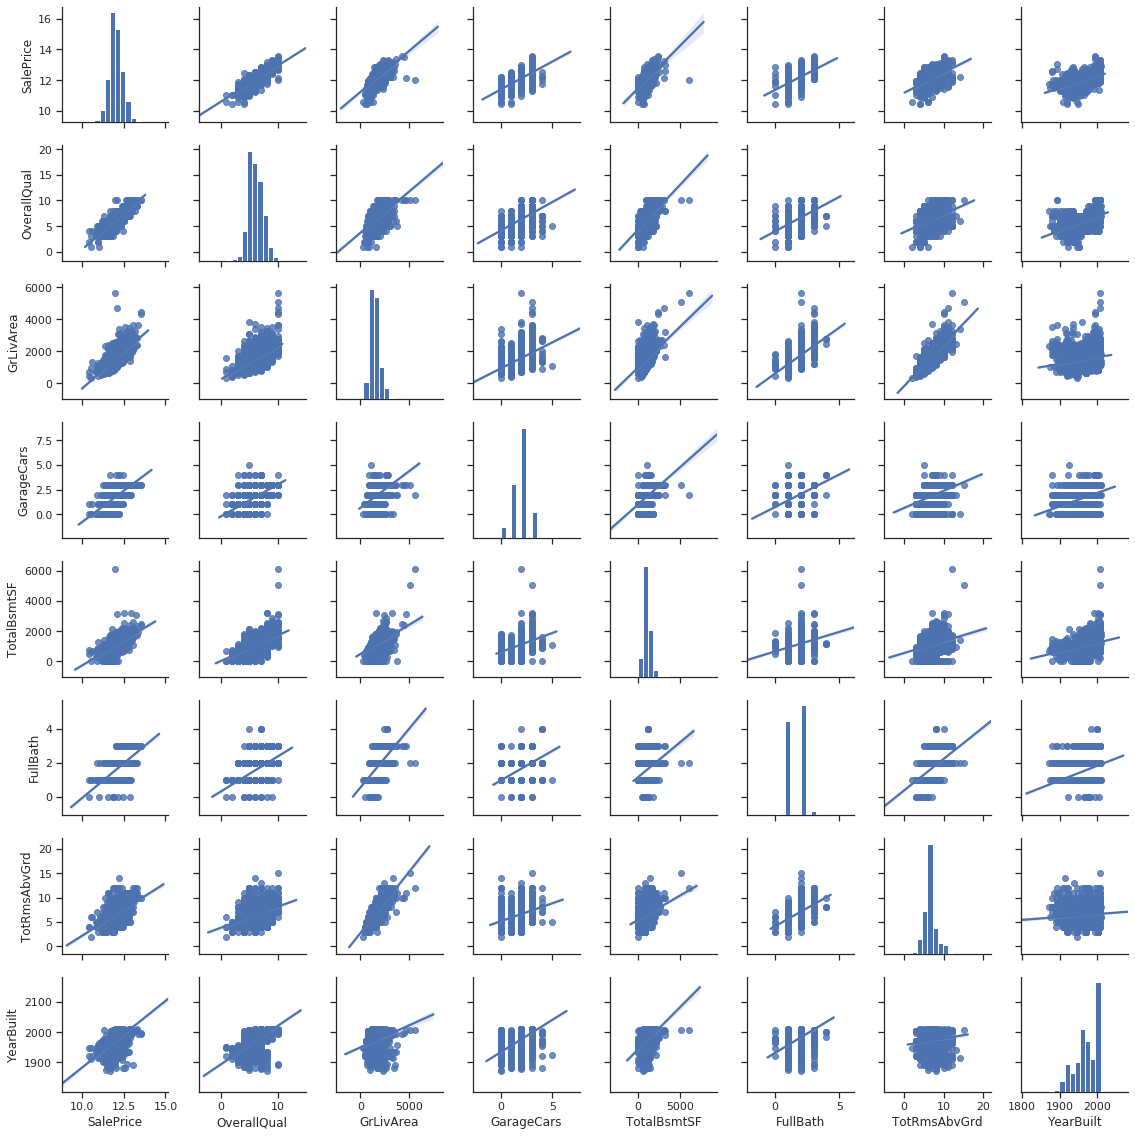

In [59]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(data_features[col], height=2, kind='reg')

In [60]:
print("Find most important features relative to target")
corr = data_features.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

# Imputting missing values

In [0]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
data_features['PoolQC'] = data_features['PoolQC'].fillna('None')

In [0]:
#Arround 50% missing values attributes have been fill by None
data_features['MiscFeature'] = data_features['MiscFeature'].fillna('None')
data_features['Alley'] = data_features['Alley'].fillna('None')
data_features['Fence'] = data_features['Fence'].fillna('None')
data_features['FireplaceQu'] = data_features['FireplaceQu'].fillna('None')
data_features['SaleCondition'] = data_features['SaleCondition'].fillna('None')

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_features['LotFrontage'] = data_features.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data_features[col] = data_features[col].fillna('None')

In [0]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data_features[col] = data_features[col].fillna(int(0))

In [0]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    data_features[col] = data_features[col].fillna('None')

In [0]:
#MasVnrArea : replace with zero
data_features['MasVnrArea'] = data_features['MasVnrArea'].fillna(int(0))

In [0]:
#MasVnrType : replace with None
data_features['MasVnrType'] = data_features['MasVnrType'].fillna('None')

In [0]:
#There is put mode value 
data_features['Electrical'] = data_features['Electrical'].fillna(data_features['Electrical']).mode()[0]

In [0]:
#There is no need of Utilities
data_features = data_features.drop(['Utilities'], axis=1)

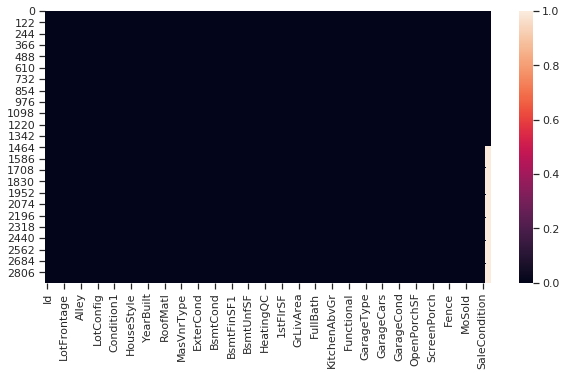

In [98]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(data_features.isnull())

## Encoding str to int

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')


In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data_features[c].values)) 
    data_features[c] = lbl.transform(list(data_features[c].values))

# Prepraring data for prediction

### Splitting the data back to train and test

In [79]:
train = data_features.iloc[:len(y_train), :]
test = data_features.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1460, 80), 'Prediction on (Sales price) shape: ', (1460,), 'Test shape: ', (1459, 80)]


In [0]:
#Take targate variable into y
y = train['SalePrice']

In [0]:
#Delete the saleprice
del train['SalePrice']

In [0]:
#Take their values in X and y
X = train.values
y = y.values

In [0]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Linear Regression

In [0]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [85]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62382101]
Real value 11.767187766223199


In [87]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.25787857357277


# RandomForestRegression

In [0]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [89]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.39034954160037


# GradientBoostingRegressor

In [0]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [92]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.63550295313311
